In [1]:
%cd ../..

c:\Users\maher\Unsupervised-anomaly-detection-on-noisy-time-series-data-for-accurate-load-forecasting


In [2]:
import torch
import matplotlib.pyplot as plt

from feature_extractor import LSTM_AE
from dataset import TS_Dataset

In [3]:
dataset_root = "data/aemo_dataset/npy_data/"
batch_size = 32
train_dataset = TS_Dataset(dataset_root, "train")

train_dataloader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=False,
    pin_memory=True,
) # both train and test datasets contain anomalies

test_dataset = TS_Dataset(dataset_root, "test")
test_dataloader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False,
    pin_memory=True,
)

In [4]:
print(f"nbr of train samples: {len(train_dataset)*batch_size}")

nbr of train samples: 658944


epoch : 1, loss_mean : 572.5533468
epoch : 2, loss_mean : 230.6222275
epoch : 3, loss_mean : 127.7499877
epoch : 4, loss_mean : 111.4668339
epoch : 5, loss_mean : 96.0301045
epoch : 6, loss_mean : 83.4951985
epoch : 7, loss_mean : 70.8217430
epoch : 8, loss_mean : 56.9106419
epoch : 9, loss_mean : 39.3863557
epoch : 10, loss_mean : 37.2482746
epoch : 11, loss_mean : 33.8485309
epoch : 12, loss_mean : 32.3352907
epoch : 13, loss_mean : 30.4841558
epoch : 14, loss_mean : 30.1750114
epoch : 15, loss_mean : 28.6638446
epoch : 16, loss_mean : 27.3681824
epoch : 17, loss_mean : 26.6825988
epoch : 18, loss_mean : 25.5222703
epoch : 19, loss_mean : 24.5082413
epoch : 20, loss_mean : 23.7140716
epoch : 21, loss_mean : 29.0751606
epoch : 22, loss_mean : 29.8970772
epoch : 23, loss_mean : 28.0543044
epoch : 24, loss_mean : 25.7215713
epoch : 25, loss_mean : 29.2867346
epoch : 26, loss_mean : 25.4439151
epoch : 27, loss_mean : 26.2056723
epoch : 28, loss_mean : 24.6311100
epoch : 29, loss_mean : 2

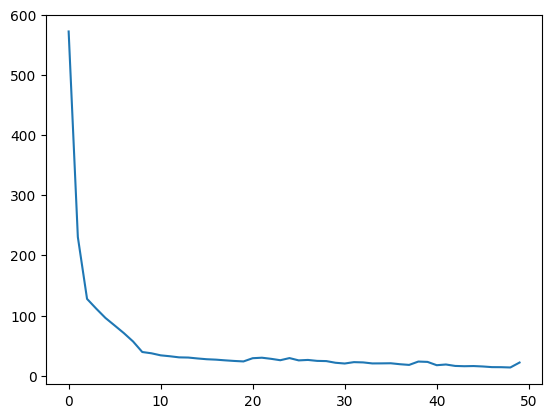

In [5]:
seq_len = 240
nbr_variables = 1
embedding_dim = seq_len
learning_rate = 1e-3
every_epoch_print = 1
epochs = 50
patience = 10
max_grad_norm = 0.05
checkpoint_path = "anomaly-detection/checkpoint.pt"

model = LSTM_AE(seq_len, nbr_variables, embedding_dim, learning_rate, every_epoch_print, epochs, patience, max_grad_norm, checkpoint_path=checkpoint_path)
loss_history = model.fit(train_dataloader)

plt.plot(loss_history)

In [6]:
loaded_model = LSTM_AE(seq_len, nbr_variables, embedding_dim, learning_rate, every_epoch_print, epochs, patience, max_grad_norm)
loaded_model.load(checkpoint_path)

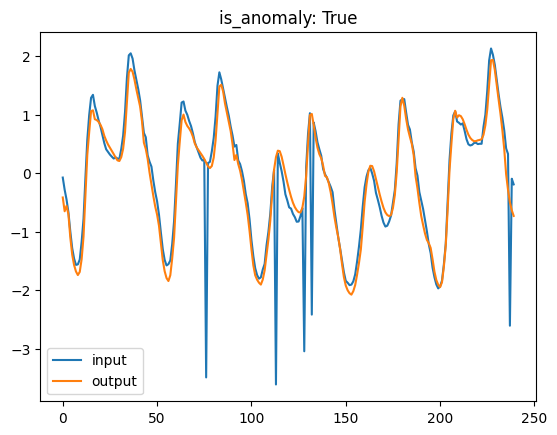

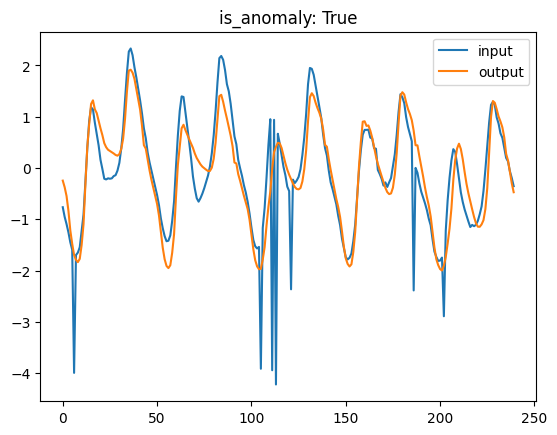

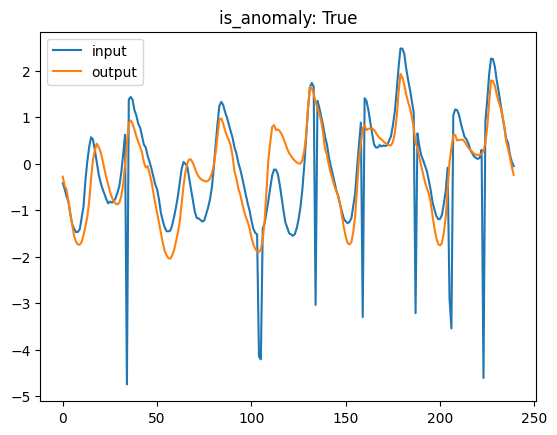

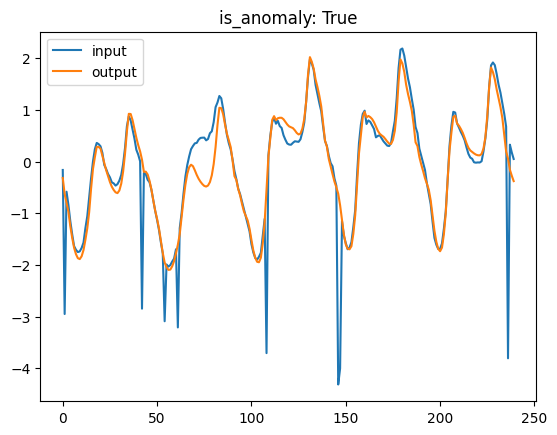

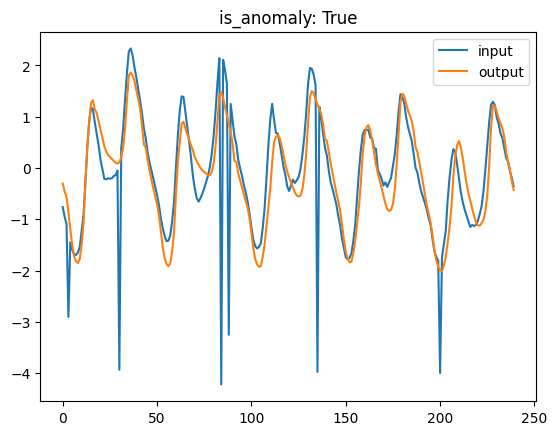

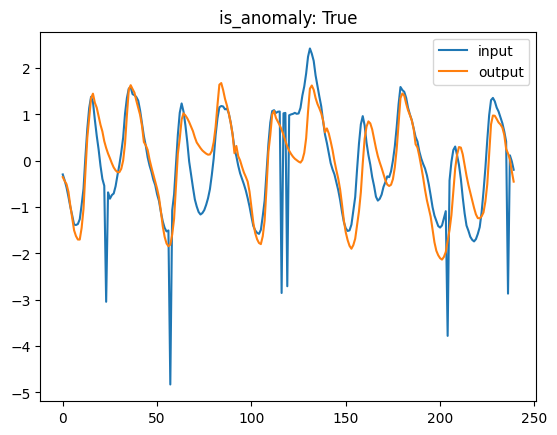

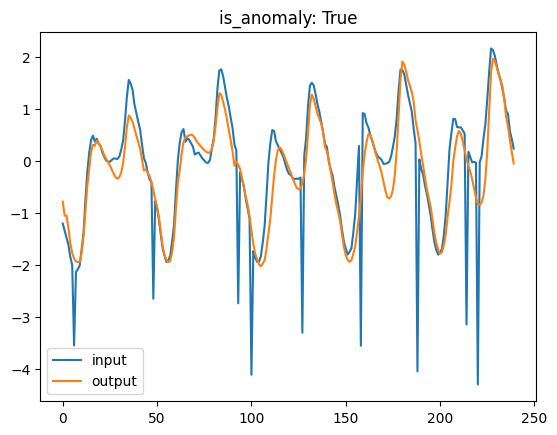

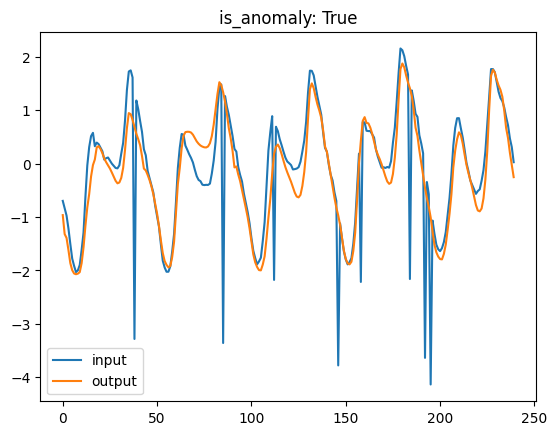

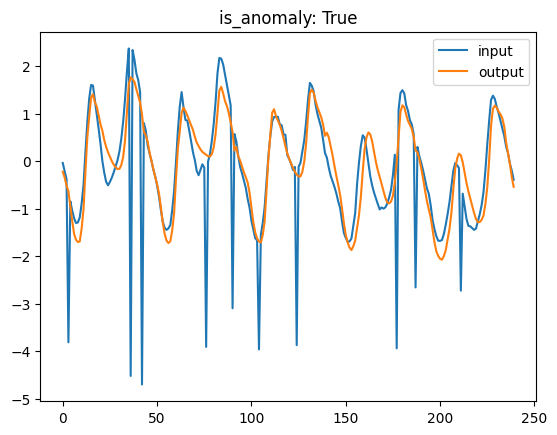

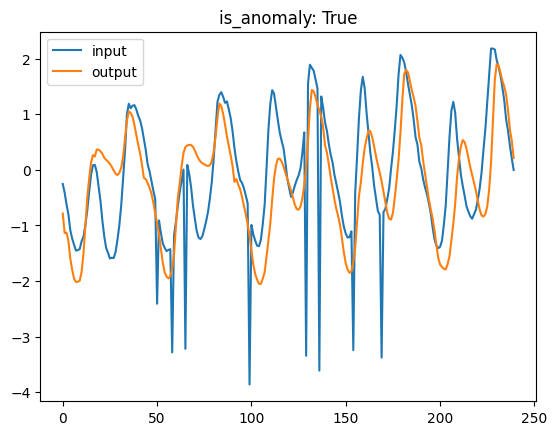

In [7]:
k = 0
flag = 0
for batch_idx, batch in enumerate(test_dataloader):
    batch_data = batch["data"]
    gt = batch["is_anomaly"]
    encoded_batch, decoded_batch = loaded_model(batch_data)
    for data_sample, decoded_sample, is_anomaly in zip(batch_data, decoded_batch, gt):
        if not is_anomaly: continue
        plt.clf()
        plt.title(f"is_anomaly: {is_anomaly}")
        plt.plot(data_sample.squeeze().cpu().data, label="input")
        plt.plot(decoded_sample.cpu().data, label="output")
        plt.legend()
        plt.show()
        plt.show()
        k += 1
        if k>=10: 
            flag = 1
            break
    if flag: break